<a href="https://colab.research.google.com/github/Aleena24/reinforcement-learning/blob/main/Nonstationary_Bandit_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Non-Stationary Bandit Class

In [25]:

class NonStationaryBandit:
    def __init__(self, k_arms, initial_means, reward_drift):
        """
        k_arms: Number of arms
        initial_means: Initial reward probabilities for each arm
        reward_drift: How much each arm's reward probability changes over time
        """
        self.k = k_arms
        self.means = np.array(initial_means)
        self.reward_drift = reward_drift

    def pull(self, arm):
        """Simulates pulling an arm (returns reward 0 or 1)"""
        reward = np.random.rand() < self.means[arm]
        return reward

    def update_means(self):
        """Applies random drift to the means of each arm"""
        drift = np.random.randn(self.k) * self.reward_drift
        self.means += drift
        self.means = np.clip(self.means, 0, 1)

# ε-Greedy with Sliding Window for Non-Stationary Bandits

In [26]:
class EpsilonGreedyNonStationary:
    def __init__(self, k_arms, epsilon, window_size):
        """
        k_arms: Number of arms
        epsilon: Exploration factor
        window_size: Sliding window size for calculating recent averages
        """
        self.k = k_arms
        self.epsilon = epsilon
        self.window_size = window_size
        self.action_counts = np.zeros(k_arms)
        self.rewards = [[] for _ in range(k_arms)]

    def select_arm(self):
        """Select an arm based on ε-greedy strategy"""
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            sliding_means = [np.mean(r[-self.window_size:]) if len(r) > 0 else 0 for r in self.rewards]
            return np.argmax(sliding_means)

    def update(self, arm, reward):
        """Update the reward history and action count for the selected arm"""
        self.rewards[arm].append(reward)
        self.action_counts[arm] += 1

In [27]:
def simulate_nonstationary_bandit(bandit, agent, rounds):
    rewards_history = []
    total_rewards = 0

    for i in range(rounds):
        arm = agent.select_arm()

        reward = bandit.pull(arm)

        agent.update(arm, reward)

        total_rewards += reward
        rewards_history.append(total_rewards)
        bandit.update_means()

    return rewards_history

In [28]:
k_arms = 5
initial_means = [0.40, 0.20, 0.4, 0.5, 0.10]
reward_drift = 0.01
epsilon = 0.1
window_size = 50
rounds = 1000

bandit = NonStationaryBandit(k_arms, initial_means, reward_drift)

agent = EpsilonGreedyNonStationary(k_arms, epsilon, window_size)

rewards_history = simulate_nonstationary_bandit(bandit, agent, rounds)

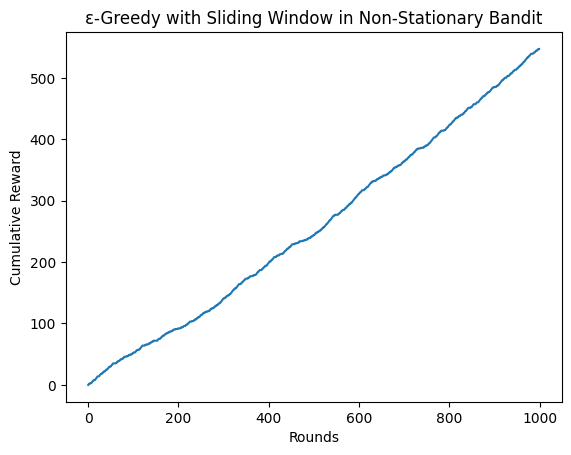

In [29]:
plt.plot(rewards_history)
plt.xlabel("Rounds")
plt.ylabel("Cumulative Reward")
plt.title("ε-Greedy with Sliding Window in Non-Stationary Bandit")
plt.show()